# Graphiques de corrélation

## Getting the dataset

In [1]:
## REQUIRED LIBRARIES
# For data wrangling 
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
from datetime import datetime
import math
df = pd.read_csv(r"../DS_CentraleSupelec_ST42021/DS_CentraleSupelec_train.csv")
df = df.drop(columns=['languageCode', 'countryCode'])
df = df.drop(columns=['userId', 'registrationDate', 'reactivationValue', 'emailContactable', 'postalContactable'])
df['hasPet'] = df.apply(lambda row: 'Yes' if str(row['petOwner'])[:3] == 'Yes' or str(row['petOwner'])[:3] == 'Oui' else 'No', axis=1)
df = df.drop(columns=['petOwner'])
def childrenMagik(children: str):
    if str(children).lower() in 'nan': return None
    if children == '4+': return 5
    return int(children)

df['nbChildren'] = df.apply(lambda row: childrenMagik(row['numberChildren']), axis=1)
df = df.drop(columns=['numberChildren'])


## Relations

Here our main interest is to get an understanding as to how the given attributes relate too the 'Automatic dishwasher' status.

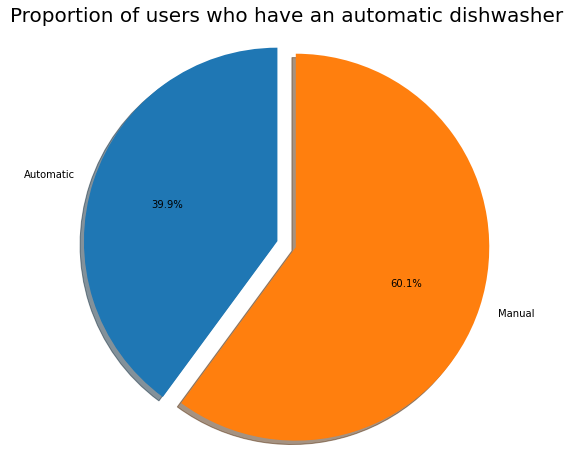

In [3]:
labels = 'Automatic', 'Manual'
sizes = [df.washDishes[df['washDishes']=='Auto'].count(), df.washDishes[df['washDishes']=='Hand'].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of users who have an automatic dishwasher", size = 20)
plt.show()

So about 40% of the customers have an automatic dishwasher. The baseline model will be to predict that 40% of the customers might be interested by the Fairy product.

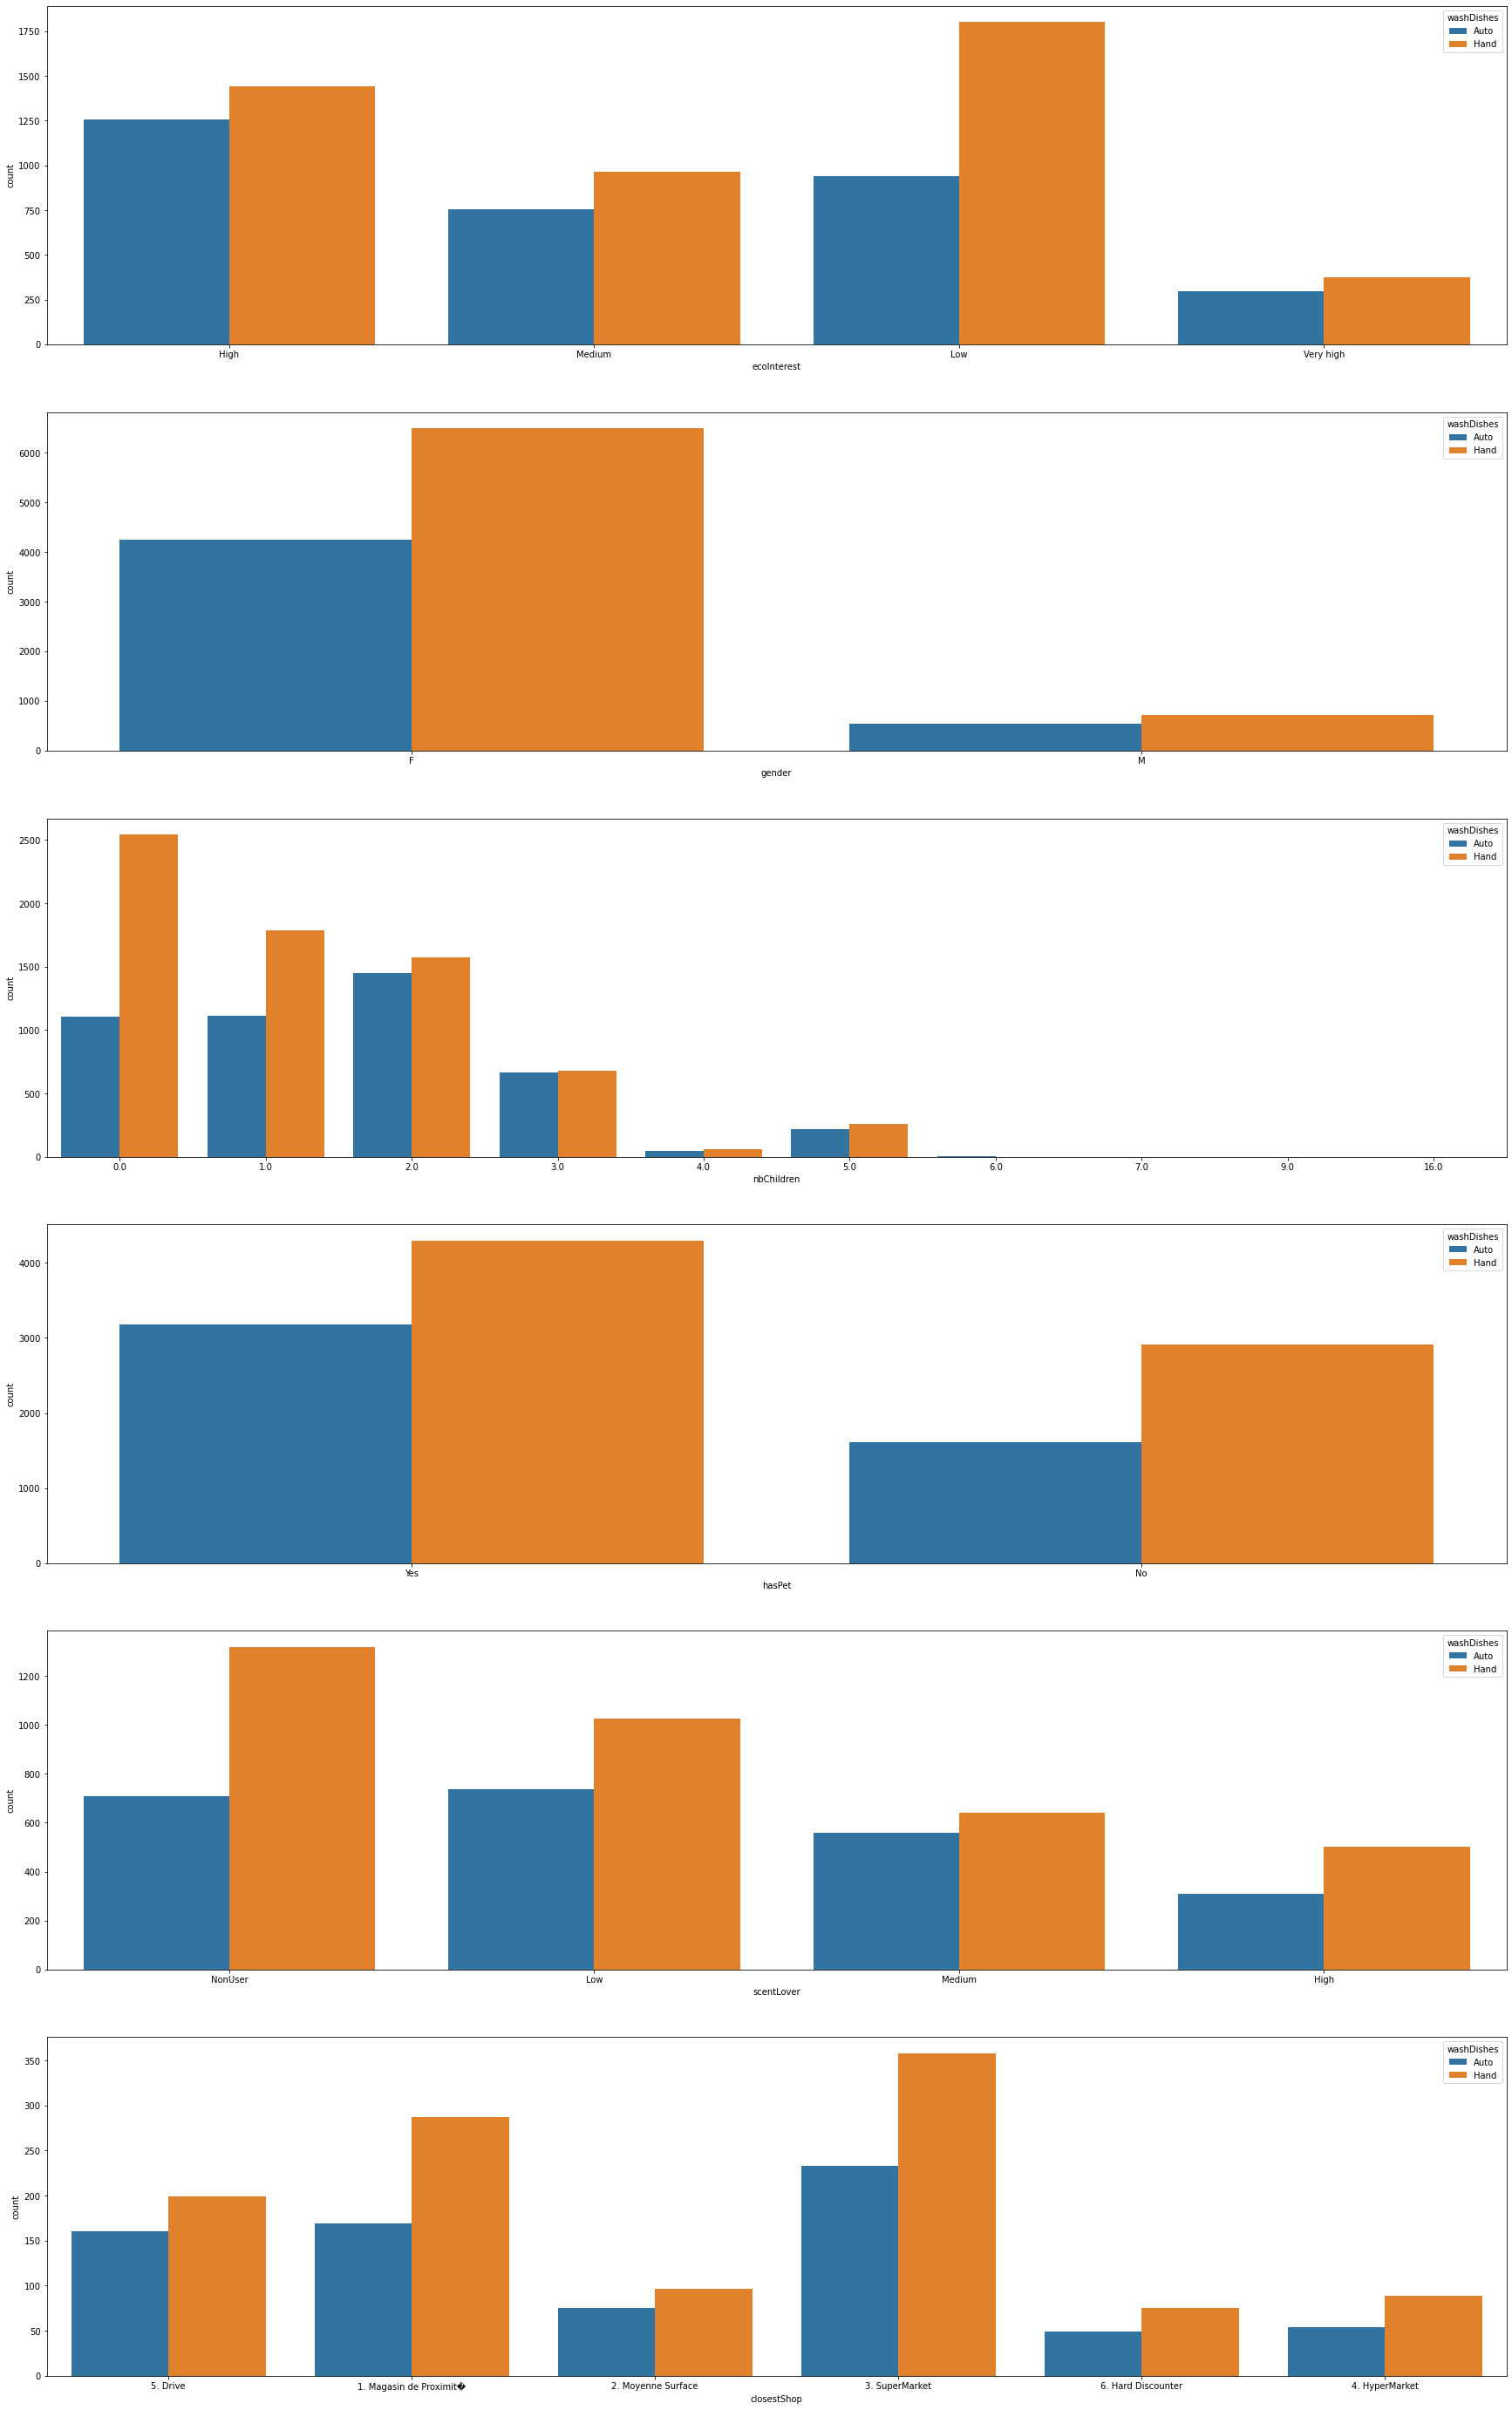

In [4]:
# We first review the relation of automatic dishwasher owners with categorical variables
fig, axarr = plt.subplots(6, 1, figsize=(30, 50))
sns.countplot(x='ecoInterest', hue = 'washDishes',data = df, ax=axarr[0])
sns.countplot(x='gender', hue = 'washDishes',data = df, ax=axarr[1])
sns.countplot(x='nbChildren', hue = 'washDishes',data = df, ax=axarr[2])
sns.countplot(x='hasPet', hue = 'washDishes',data = df, ax=axarr[3])
sns.countplot(x='scentLover', hue = 'washDishes',data = df, ax=axarr[4])
sns.countplot(x='closestShop', hue = 'washDishes',data = df, ax=axarr[5])

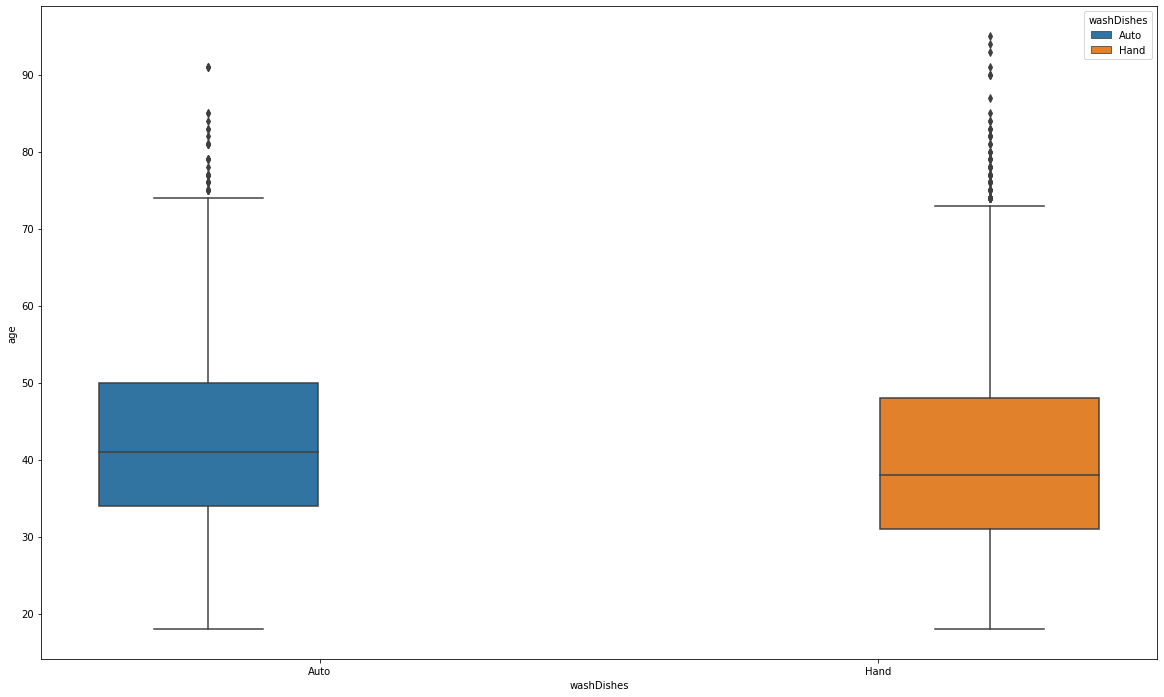

In [5]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(1, 1, figsize=(20, 12))
sns.boxplot(y='age',x = 'washDishes', hue = 'washDishes',data = df, ax=axarr)